In [77]:
from skimage import measure
import plotly.graph_objects as go
from ipywidgets import widgets
from IPython.display import display

import pandas as pd
import numpy as np
from pyemd import emd_samples
from IPython.display import display

# To import packages from the parent directory
import sys
sys.path.insert(0,'..')

# Autoreload allows us to update our code mid-notebook
%load_ext autoreload
%autoreload 2

# Our code
import processing
import visualization

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, Skimage is capable of finding area, perimeter, and the Euler characteristic for each component of an image.

These examples demonstrate this:

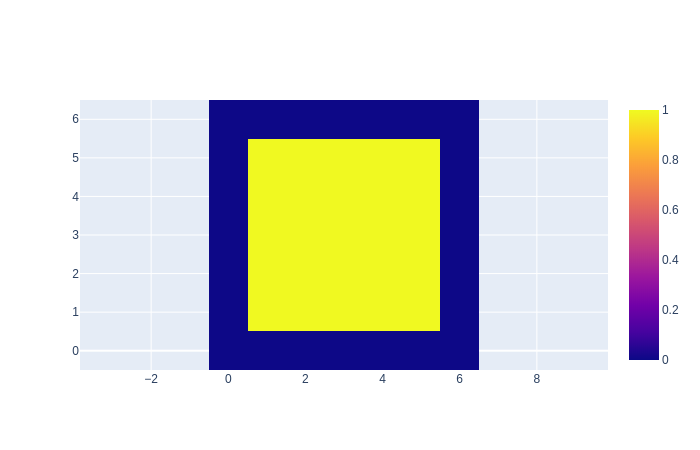


Props for component 0:
  - Area       : 25
  - Parameter  : 16.0
  - Euler Char.: 1


In [46]:
image = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]
], dtype=float)

display(go.Figure(go.Heatmap(z=image), go.Layout(xaxis=dict(scaleanchor='y'))))

region_props = measure.regionprops(measure.label(image))
for idx, props in enumerate(region_props):
    print()
    print(f'Props for component {idx}:')
    print(f'  - Area       : {props.area}')
    print(f'  - Parameter  : {props.perimeter}')
    print(f'  - Euler Char.: {props.euler_number}')

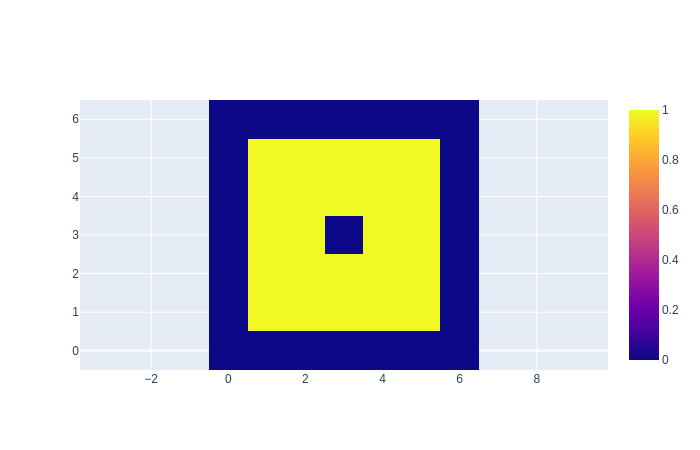


Props for component 0:
  - Area       : 24
  - Parameter  : 16.0
  - Euler Char.: 0


In [47]:
image = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]
], dtype=float)

display(go.Figure(go.Heatmap(z=image), go.Layout(xaxis=dict(scaleanchor='y'))))

region_props = measure.regionprops(measure.label(image))
for idx, props in enumerate(region_props):
    print()
    print(f'Props for component {idx}:')
    print(f'  - Area       : {props.area}')
    print(f'  - Parameter  : {props.perimeter}')
    print(f'  - Euler Char.: {props.euler_number}')

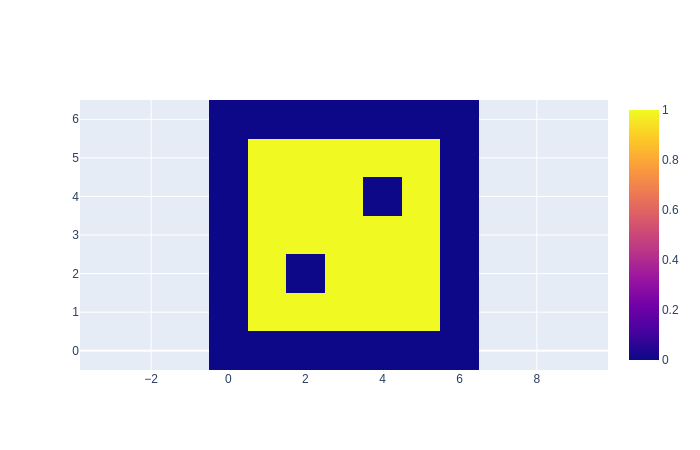


Props for component 0:
  - Area       : 23
  - Parameter  : 16.0
  - Euler Char.: -1


In [48]:
image = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]
], dtype=float)

display(go.Figure(go.Heatmap(z=image), go.Layout(xaxis=dict(scaleanchor='y'))))

region_props = measure.regionprops(measure.label(image))
for idx, props in enumerate(region_props):
    print()
    print(f'Props for component {idx}:')
    print(f'  - Area       : {props.area}')
    print(f'  - Parameter  : {props.perimeter}')
    print(f'  - Euler Char.: {props.euler_number}')

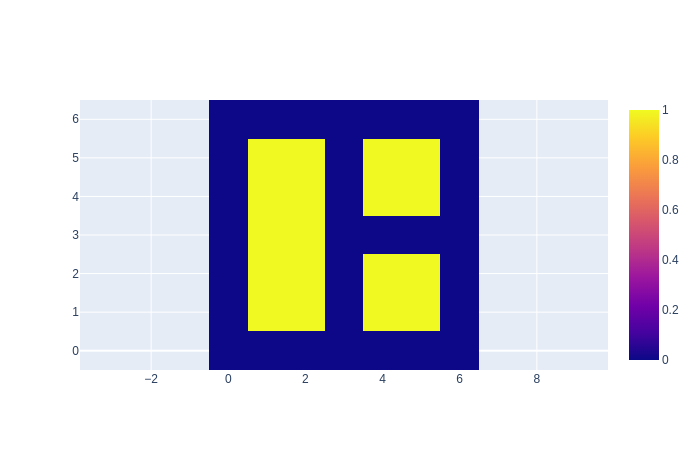


Props for component 0:
  - Area       : 10
  - Parameter  : 10.0
  - Euler Char.: 1

Props for component 1:
  - Area       : 4
  - Parameter  : 4.0
  - Euler Char.: 1

Props for component 2:
  - Area       : 4
  - Parameter  : 4.0
  - Euler Char.: 1


In [49]:
image = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 1, 0],
    [0, 1, 1, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 1, 0],
    [0, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]
], dtype=float)

display(go.Figure(go.Heatmap(z=image), go.Layout(xaxis=dict(scaleanchor='y'))))

region_props = measure.regionprops(measure.label(image))
for idx, props in enumerate(region_props):
    print()
    print(f'Props for component {idx}:')
    print(f'  - Area       : {props.area}')
    print(f'  - Parameter  : {props.perimeter}')
    print(f'  - Euler Char.: {props.euler_number}')

Next, we try this on our data.

In [51]:
# Load the data in as a Pandas DataFrame
df = pd.read_pickle('../data/sample_morphologies.pickle')
print(f'Length of df: {len(df)}')

Length of df: 496


In [53]:
sample = df.iloc[206] # grab random sample
sample_image = sample.image.reshape((100, 400))
visualization.get_image_figure(sample_image)#, height=250, width=1000)

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'showscale': False,
              'type': 'hea…

In [58]:
sample_scalars = processing.extract_minkowski_scalars(sample_image)
print(sample_scalars[0:3])

[[ 7.00000000e+00  7.20710678e+00  1.00000000e+00]
 [ 2.25710000e+04  5.70215505e+03 -5.50000000e+01]
 [ 2.80000000e+01  2.04852814e+01  1.00000000e+00]]


In [59]:
sample_x = df.iloc[206].image.reshape((100, 400))
sample_y = df.iloc[103].image.reshape((100, 400))

display(visualization.get_image_figure(sample_x))
display(visualization.get_image_figure(sample_y))

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'showscale': False,
              'type': 'hea…

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'showscale': False,
              'type': 'hea…

In [60]:
sigs_x = processing.extract_minkowski_scalars(sample_x)
sigs_y = processing.extract_minkowski_scalars(sample_y)

emd_samples(sigs_x, sigs_y)

39.5153529979523

In [61]:
def get_dist_matrix(sigs_x, sigs_y=None):
    if sigs_y is None:
        sigs_y = sigs_x
    dist_matrix = []
    for y in sigs_y:
        row = []
        for x in sigs_x:
            row.append(emd_samples(x, y))
        dist_matrix.append(row)
    return dist_matrix

def get_minkowski_signatures(images):
    sigs = []
    for image in images:
        sigs.append(processing.extract_minkowski_scalars(image))
    return sigs

In [68]:
images = df.iloc[:10].image.apply(lambda d: d.reshape((100, 400)))
sigs = get_minkowski_signatures(images)
dist_matrix = get_dist_matrix(sigs)

In [69]:
viz = visualization.get_distance_matrix_figure(dist_matrix)
viz.data[0].update(zmin=0., zmax=150) # this adjusts the color scale
display(viz)

FigureWidget({
    'data': [{'type': 'heatmap',
              'uid': 'c8559ff1-47b3-4b19-9412-10d2a7b0292b',
 …

In [80]:
def compare_trajs_widget(traj_x, traj_y=None, zmax=150):
    # This builds the distance widget using the given trajectory params
    if traj_y is None:
        traj_y = traj_x
    indices_x = sorted(df[
        (df.BR == traj_x['BR']) &
        (df.CHI == traj_x['CHI']) &
        (df.version == traj_x['version'])
    ].index)
    indices_y = sorted(df[
        (df.BR == traj_y['BR']) &
        (df.CHI == traj_y['CHI']) &
        (df.version == traj_y['version'])
    ].index)
    df_x = df.iloc[indices_x]
    df_y = df.iloc[indices_y]
    
    sigs_x = get_minkowski_signatures(df_x.image.apply(lambda d: d.reshape((100, 400))))
    sigs_y = get_minkowski_signatures(df_y.image.apply(lambda d: d.reshape((100, 400))))
    dist_matrix = get_dist_matrix(sigs_x, sigs_y)
    return visualization.get_distance_matrix_widget(dist_matrix, df_x, df_y, zmax=zmax)

In [82]:
# visualize two trajectories with the same parameters
traj_x = { 'BR': 0.53, 'CHI': 3.4, 'version': 1 }

widgets.VBox([
    widgets.HTML(f'''
    <div style="text-align: center;">
        <h1>Trajectory</h1>
        <h2>{traj_x}</h2>
    </div>
    '''),
    compare_trajs_widget(traj_x)
], layout=widgets.Layout(
    width='600px'
))

In [81]:
# visualize two trajectories with the same parameters
traj_x = { 'BR': 0.53, 'CHI': 3.4, 'version': 1 }
traj_y = { 'BR': 0.53, 'CHI': 3.4, 'version': 2 }

widgets.VBox([
    widgets.HTML(f'''
    <div style="text-align: center;">
        <h1>Trajectories</h1>
        <h2>{traj_x}<br>{traj_y}</h2>
    </div>
    '''),
    compare_trajs_widget(traj_x, traj_y)
], layout=widgets.Layout(
    width='600px'
))

In [83]:
# visualize two trajectories with the same parameters
traj_x = { 'BR': 0.53, 'CHI': 3.4, 'version': 1 }
traj_y = { 'BR': 0.56, 'CHI': 4.0, 'version': 1 }

widgets.VBox([
    widgets.HTML(f'''
    <div style="text-align: center;">
        <h1>Trajectories</h1>
        <h2>{traj_x}<br>{traj_y}</h2>
    </div>
    '''),
    compare_trajs_widget(traj_x, traj_y)
], layout=widgets.Layout(
    width='600px'
))